# Ollama Python Library
- By Marcelo Rovai @25Sept24

In [2]:
import ollama

In [3]:
ollama.list()

{'models': [{'name': 'nomic-embed-text:latest',
   'model': 'nomic-embed-text:latest',
   'modified_at': '2024-09-28T17:27:22.864552182+01:00',
   'size': 274302450,
   'digest': '0a109f422b47e3a30ba2b10eca18548e944e8a23073ee3f3e947efcf3c45e59f',
   'details': {'parent_model': '',
    'format': 'gguf',
    'family': 'nomic-bert',
    'families': ['nomic-bert'],
    'parameter_size': '137M',
    'quantization_level': 'F16'}},
  {'name': 'llama3.2:1b',
   'model': 'llama3.2:1b',
   'modified_at': '2024-09-25T20:30:47.860335728+01:00',
   'size': 1321098329,
   'digest': 'baf6a787fdffd633537aa2eb51cfd54cb93ff08e28040095462bb63daf552878',
   'details': {'parent_model': '',
    'format': 'gguf',
    'family': 'llama',
    'families': ['llama'],
    'parameter_size': '1.2B',
    'quantization_level': 'Q8_0'}},
  {'name': 'llama3.2:3b',
   'model': 'llama3.2:3b',
   'modified_at': '2024-09-25T20:16:46.08411191+01:00',
   'size': 2019393189,
   'digest': 'a80c4f17acd55265feec403c7aef86be0c2598

In [5]:
type(ollama.list())

dict

In [29]:
ollama.show('llava-phi3:3.8b')

{'modelfile': '# Modelfile generated by "ollama show"\n# To build a new Modelfile based on this, replace FROM with:\n# FROM llava-phi3:3.8b\n\nFROM /usr/share/ollama/.ollama/models/blobs/sha256-377876be20bac24488716c04824ab3a6978900679b40013b0d2585004555e658\nFROM /usr/share/ollama/.ollama/models/blobs/sha256-004fc09697203296f72321b296a8d48aade2d23e553cbfb1c1e6a0b5157a08d5\nTEMPLATE "{{ if .System }}<|system|>\n{{ .System }}<|end|>\n{{ end }}{{ if .Prompt }}<|user|>\n{{ .Prompt }}<|end|>\n{{ end }}<|assistant|>\n{{ .Response }}<|end|>\n"\nPARAMETER num_ctx 4096\nPARAMETER num_keep 4\nPARAMETER stop <|user|>\nPARAMETER stop <|assistant|>\nPARAMETER stop <|system|>\nPARAMETER stop <|end|>\nPARAMETER stop <|endoftext|>\n',
 'parameters': 'num_ctx                        4096\nnum_keep                       4\nstop                           "<|user|>"\nstop                           "<|assistant|>"\nstop                           "<|system|>"\nstop                           "<|end|>"\nstop 

In [3]:
# ollama.embed(model='gemma2:2b', input='Brazil')

## ollama.generate()

In [6]:
MODEL = 'gemma2:2b'
PROMPT = 'What is the capital of France?'

res = ollama.generate(model=MODEL, prompt=PROMPT)
print (res)

{'model': 'gemma2:2b', 'created_at': '2024-09-25T14:43:31.869633807Z', 'response': 'The capital of France is **Paris**. 🇫🇷 \n', 'done': True, 'done_reason': 'stop', 'context': [106, 1645, 108, 1841, 603, 573, 6037, 576, 6081, 235336, 107, 108, 106, 2516, 108, 651, 6037, 576, 6081, 603, 5231, 29437, 168428, 235248, 244304, 241035, 235248, 108], 'total_duration': 24259469458, 'load_duration': 19830013859, 'prompt_eval_count': 16, 'prompt_eval_duration': 1908757000, 'eval_count': 14, 'eval_duration': 2475410000}


In [7]:
type(res)

dict

In [8]:
print(f"\n{res['response']}")
print(f"\n [INFO] Total Duration: {(res['total_duration']/1e9):.2f} seconds")


The capital of France is **Paris**. 🇫🇷 


 [INFO] Total Duration: 24.26 seconds


In [10]:
PROMPT_1 = 'What is the capital of France?'

response = ollama.chat(model=MODEL, messages=[
{'role': 'user','content': PROMPT_1,},])
resp_1 = response['message']['content']
print(f"\n{resp_1}")
print(f"\n [INFO] Total Duration: {(res['total_duration']/1e9):.2f} seconds")


The capital of France is **Paris**. 🇫🇷 


 [INFO] Total Duration: 24.26 seconds


## Using Ollama.chat()

In [11]:
PROMPT_1 = 'What is the capital of France?'
response = ollama.chat(model=MODEL, messages=[
{'role': 'user','content': PROMPT_1,},])
resp_1 = response['message']['content']
print(f"\n{resp_1}")
print(f"\n [INFO] Total Duration: {(response['total_duration']/1e9):.2f} seconds")

PROMPT_2 = 'and of Italy?'
response = ollama.chat(model=MODEL, messages=[
{'role': 'user','content': PROMPT_1,},
{'role': 'assistant','content': resp_1,},
{'role': 'user','content': PROMPT_2,},])
resp_2 = response['message']['content']
print(f"\n{resp_2}")
print(f"\n [INFO] Total Duration: {(response['total_duration']/1e9):.2f} seconds")


The capital of France is **Paris**. 🇫🇷 


 [INFO] Total Duration: 2.82 seconds

The capital of Italy is **Rome**. 🇮🇹 


 [INFO] Total Duration: 4.46 seconds


## Getting an image description

In [24]:
ls *jpg

 image_test_1.jpg  'image _test_2.jpg'


In [26]:
import matplotlib.pyplot as plt
from PIL import Image

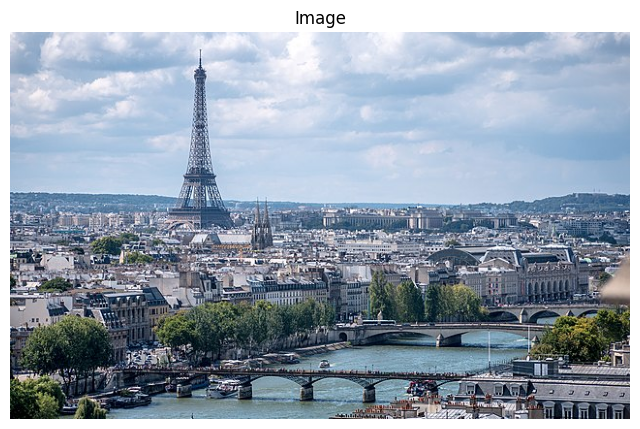

In [28]:
# Load he image
img_path = "image_test_1.jpg"
img = Image.open(img_path)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Image")
plt.show()

In [19]:
MODEL = 'llava-phi3:3.8b'
PROMPT = "Describe this picture"

with open('image_test_1.jpg', 'rb') as image_file:
    img = image_file.read()

response = ollama.generate(
    model=MODEL,
    prompt=PROMPT,
    images= [img]
)
print(f"\n{response['response']}")
print(f"\n [INFO] Total Duration: {(response['total_duration']/1e9):.2f} seconds")


The image captures a vibrant and bustling cityscape, dominated by the iconic Eiffel Tower in Paris, France. The tower, a marvel of iron lattice work, stands tall on the left side of the frame, piercing the sky with its intricate design. 

The Seine River meanders through the heart of the city, adding a dynamic element to the urban landscape. Several boats are seen dotting the river's surface, perhaps enjoying a leisurely cruise or ferrying passengers along the waterway.

On either side of the river, buildings rise in varying heights and architectural styles, creating a diverse skyline that reflects Paris' rich history and modern development. Their colors range from pastel hues to more robust shades, contributing to the city's colorful palette.

The image is taken from an elevated perspective, offering a bird's eye view of this beautiful city. The blue sky forms a serene backdrop to the urban scene, its vastness contrasting with the densely packed buildings and bustling river below. 



In [20]:
print(f"\n [INFO] Load_Duration: {(response['load_duration']/1e9):.2f} seconds")


 [INFO] Load_Duration: 21.40 seconds


In [21]:
print(f"\n [INFO] Promp Eval Duration: {(response['prompt_eval_duration']/1e9):.2f} seconds")


 [INFO] Promp Eval Duration: 139.78 seconds


In [22]:
print(response)

{'model': 'llava-phi3:3.8b', 'created_at': '2024-09-25T16:04:59.342350258Z', 'response': "The image captures a vibrant and bustling cityscape, dominated by the iconic Eiffel Tower in Paris, France. The tower, a marvel of iron lattice work, stands tall on the left side of the frame, piercing the sky with its intricate design. \n\nThe Seine River meanders through the heart of the city, adding a dynamic element to the urban landscape. Several boats are seen dotting the river's surface, perhaps enjoying a leisurely cruise or ferrying passengers along the waterway.\n\nOn either side of the river, buildings rise in varying heights and architectural styles, creating a diverse skyline that reflects Paris' rich history and modern development. Their colors range from pastel hues to more robust shades, contributing to the city's colorful palette.\n\nThe image is taken from an elevated perspective, offering a bird's eye view of this beautiful city. The blue sky forms a serene backdrop to the urban